In [1]:
#importing the essiantial Classes 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data
dataEmpAbs = pd.read_excel('d:/edwisor/Absenteeism_Practice.xls')

In [3]:
dataEmpAbsOrgCpy = dataEmpAbs.copy()

In [4]:
#Checking the data
dataEmpAbs.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


# Exploratory Data Analysis and Pre-Processing

In [5]:
#checking the info of Data
dataEmpAbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [6]:
#sns.barplot(x=dataEmpAbs.nunique())
dataEmpAbs.iloc[:,:-1].nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
dtype: int64

In [7]:
#from the above unique values we can easily differentiate the Continous and categorial variables
continuous_variable = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 
                       'Transportation expense','Hit target', 'Weight', 'Height', 'Body mass index',
                       'Absenteeism time in hours']


In [8]:
categorical_variable = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure', 
                        'Education', 'Social drinker','Social smoker', 'Pet', 'Son']

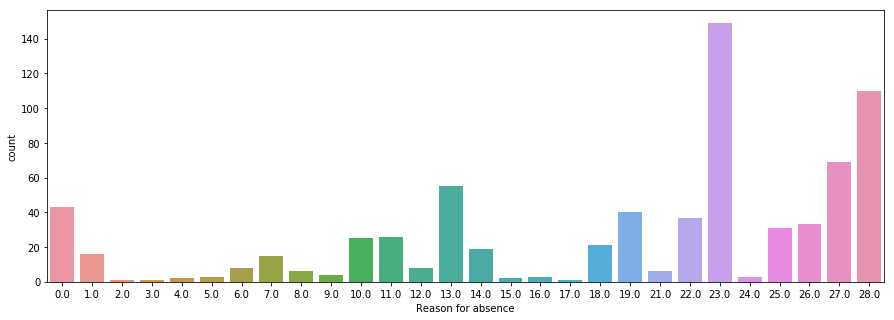

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x=dataEmpAbs['Reason for absence'])

### Top 3 reasons of being absent are
#1- 23 is the topmost reason
#2- 28 is secondmost
#3- 27 is thirdmost reason 


### lets check which employee has been absent for maximum hours

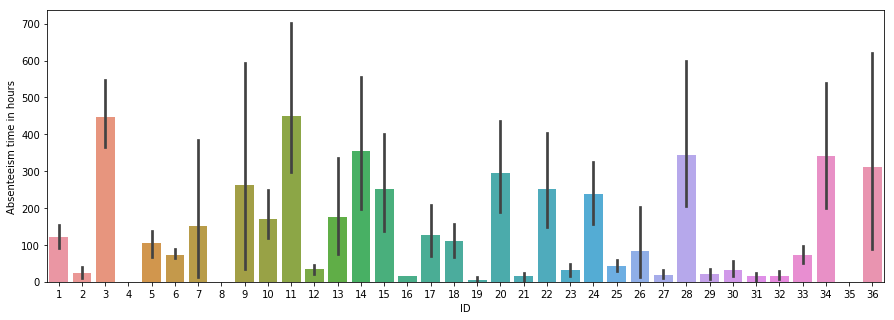

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=dataEmpAbs['ID'],y='Absenteeism time in hours',data=dataEmpAbs,estimator=np.sum)

In [11]:
dataEmpAbs.groupby('ID')['Absenteeism time in hours'].sum().sort_values(ascending=False).head(5)

ID
11    450.0
3     448.0
14    356.0
28    345.0
34    341.0
Name: Absenteeism time in hours, dtype: float64

#### from the above Data and Visualisation we can clearly see the top 5 employees having being absent from total hours

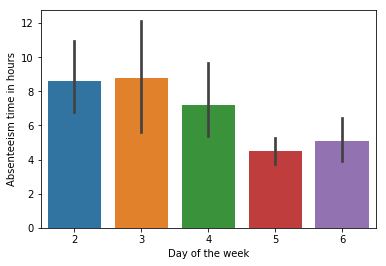

In [14]:
sns.barplot(x=dataEmpAbs['Day of the week'],y='Absenteeism time in hours',data=dataEmpAbs)

### comparision of Absent hours in employee how many are Smoker,Drinker and Non-smoker,Non-drinker

In [12]:
dataEmpAbs[(dataEmpAbs['Social drinker']==1) & (dataEmpAbs['Social smoker']==1)]['Absenteeism time in hours'].sum()

280.0

In [13]:
dataEmpAbs[(dataEmpAbs['Social drinker']==0) & (dataEmpAbs['Social smoker']==0)]['Absenteeism time in hours'].sum()

1677.0

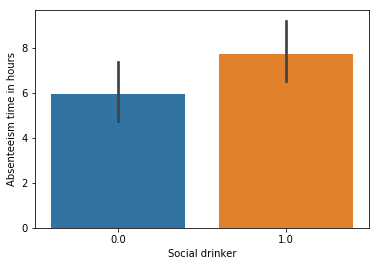

In [96]:
sns.barplot(dataEmpAbsOrgCpy['Social drinker'],dataEmpAbsOrgCpy['Absenteeism time in hours'])

#### Drinkers took more leaves thn non drinkers

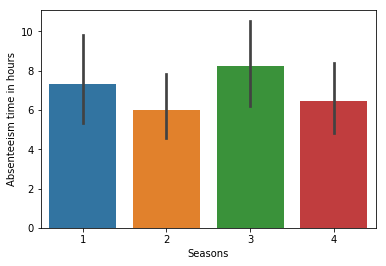

In [94]:
sns.barplot(dataEmpAbsOrgCpy['Seasons'],dataEmpAbsOrgCpy['Absenteeism time in hours'],data=dataEmpAbsOrgCpy)

###  Season: (summer (1), autumn (2), winter (3), spring (4))
### In Winter and Summer absenteeism is high

## Missing value analysis

In [14]:
missVal = pd.DataFrame(dataEmpAbs.isnull().sum()).reset_index()
missVal

,index,0
0,ID,0
1,Reason for absence,3
2,Month of absence,1
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


In [15]:
missVal = missVal.rename(columns={'index':'ColNames',0:'MissVal'})

In [16]:
missVal

,ColNames,MissVal
0,ID,0
1,Reason for absence,3
2,Month of absence,1
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


### there are missing values but not very high so none of the variable will be drop due to missing value
### target variable has some missing values so we will be Dropping those values

In [17]:
dataEmpAbs.drop(dataEmpAbs[dataEmpAbs['Absenteeism time in hours'].isnull()].index,axis=0,inplace=True)

In [18]:
dataEmpAbs['Absenteeism time in hours'].isnull().sum()

0

## Imputation of null values using KNN

In [19]:
from fancyimpute import KNN

C:\Users\administrator\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [20]:
dataEmpAbs = pd.DataFrame(KNN(k=3).fit_transform(dataEmpAbs),columns=dataEmpAbs.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.437
Imputing row 101/718 with 1 missing, elapsed time: 0.453
Imputing row 201/718 with 0 missing, elapsed time: 0.453
Imputing row 301/718 with 0 missing, elapsed time: 0.453
Imputing row 401/718 with 0 missing, elapsed time: 0.453
Imputing row 501/718 with 1 missing, elapsed time: 0.453
Imputing row 601/718 with 0 missing, elapsed time: 0.453
Imputing row 701/718 with 0 missing, elapsed time: 0.453


In [21]:
dataEmpAbs.isnull().sum().sum()

0

# Convert into proper datatypes

In [22]:

for i in categorical_variable:
    dataEmpAbs.loc[:,i] = dataEmpAbs.loc[:,i].round()  # some data during KNN imputation got changed as decimal values
    dataEmpAbs.loc[:,i] = dataEmpAbs.loc[:,i].astype('object')

In [23]:
for i in continuous_variable:
    dataEmpAbs.loc[:,i] = dataEmpAbs.loc[:,i].astype(int)

In [24]:
dataEmpAbsAftImpt = dataEmpAbs.copy()

### OutLier Analysis

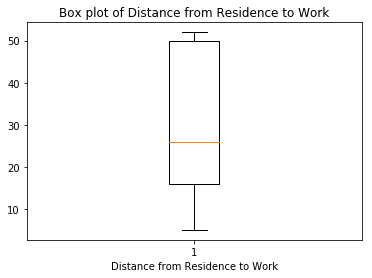

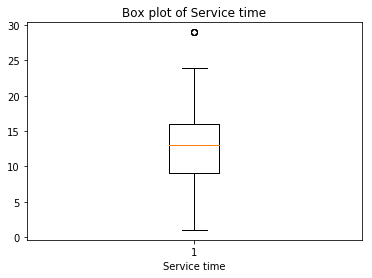

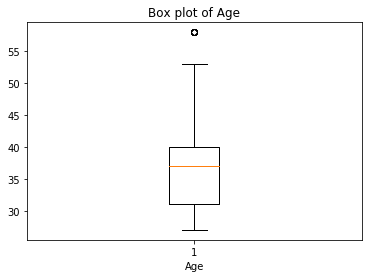

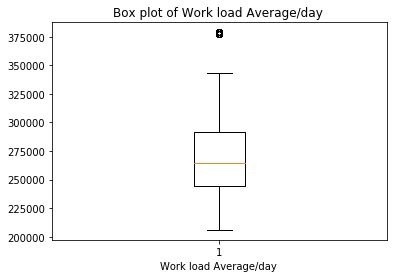

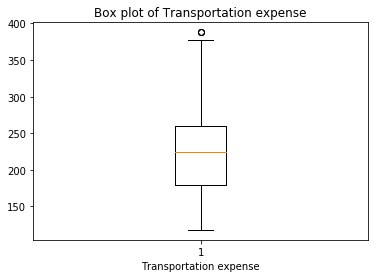

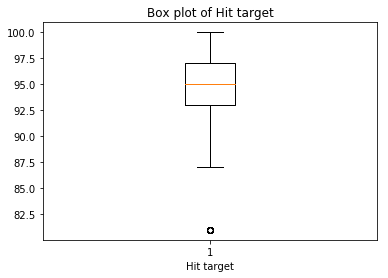

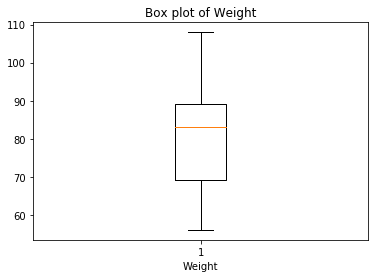

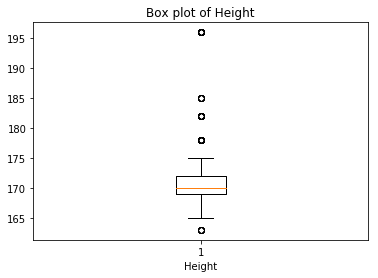

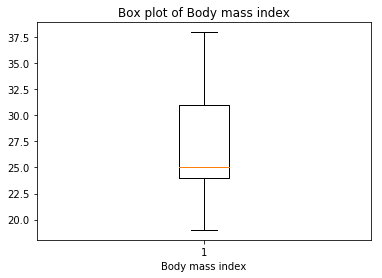

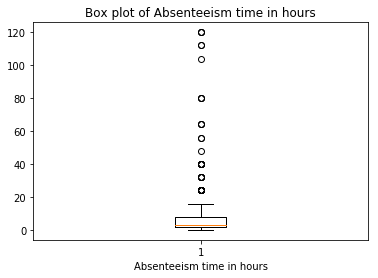

In [25]:
for i in continuous_variable:
    #if i == 'Absenteeism time in hours':
        #continue
    plt.boxplot(dataEmpAbs[i])
    plt.title('Box plot of '+str(i))
    plt.xlabel(i)
    plt.show()

In [26]:
for i in continuous_variable:
    if i == 'Absenteeism time in hours':
        continue
    # calculating the percentile q75 & q25
    q75,q25 = np.percentile(dataEmpAbs[i],[75,25])
    #calculation inter quarlite range
    iqr = q75 - q25
    #calculating the upper fence and lower fence
    minimum = q25 - (1.5*iqr)
    maximum = q75 + (1.5*iqr)
    print(minimum)
    print(maximum)
        
    #replcing outliers with NAN
    dataEmpAbs.loc[dataEmpAbs[i] < minimum,i] = np.nan
    dataEmpAbs.loc[dataEmpAbs[i] > maximum,i] = np.nan
        

-35.0
101.0
-1.5
26.5
17.5
53.5
173153.5
363109.5
57.5
381.5
87.0
103.0
39.0
119.0
164.5
176.5
13.5
41.5


In [27]:
dataEmpAbs.isnull().sum()

ID                                   0
Reason for absence                   0
Month of absence                     0
Day of the week                      0
Seasons                              0
Transportation expense               3
Distance from Residence to Work      0
Service time                         5
Age                                  8
Work load Average/day               29
Hit target                          19
Disciplinary failure                 0
Education                            0
Son                                  0
Social drinker                       0
Social smoker                        0
Pet                                  0
Weight                               0
Height                             114
Body mass index                      0
Absenteeism time in hours            0
dtype: int64

### Imputation with KNN

In [28]:
dataEmpAbs = pd.DataFrame(KNN(k=3).fit_transform(dataEmpAbs),columns=dataEmpAbs.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.239
Imputing row 101/718 with 0 missing, elapsed time: 0.239
Imputing row 201/718 with 1 missing, elapsed time: 0.239
Imputing row 301/718 with 0 missing, elapsed time: 0.239
Imputing row 401/718 with 0 missing, elapsed time: 0.239
Imputing row 501/718 with 0 missing, elapsed time: 0.239
Imputing row 601/718 with 1 missing, elapsed time: 0.239
Imputing row 701/718 with 0 missing, elapsed time: 0.239


### Feature selection 
### Co-relation

In [29]:
corrdata = dataEmpAbs.loc[:,continuous_variable].corr()

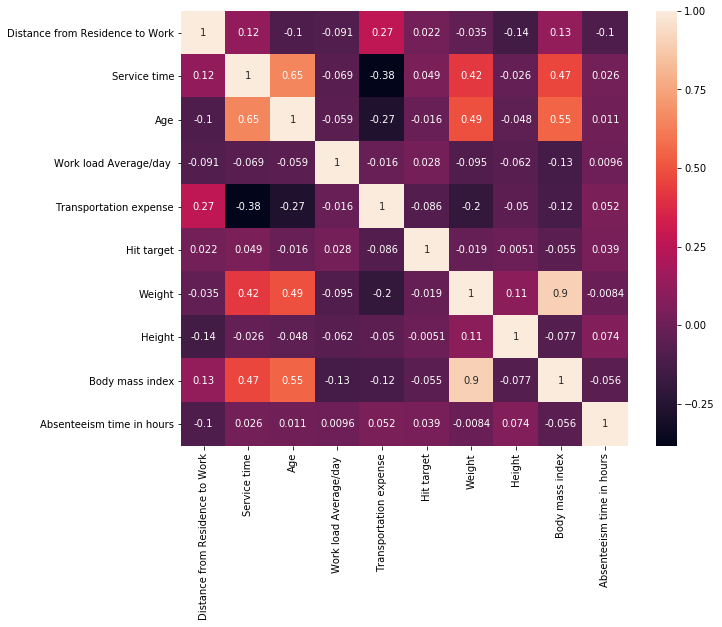

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corrdata,annot=True)

In [31]:
#above grapth suggests that weight is haing redundant information
dataEmpAbs.drop('Weight',axis=1,inplace=True)


In [32]:
#updating continous variables
continuous_variable.remove('Weight')
continuous_variable

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Transportation expense',
 'Hit target',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [33]:
dataEmpAbs.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

### Feature Scaling

In [34]:
#checking the variance of Continous Variables
for i in continuous_variable:
    if i == 'Absenteeism time in hours':
        continue
    print(dataEmpAbs[i].var())

218.65751564667022
17.21668193314192
36.93060674111103
1040107734.1447943
4252.468469250886
9.47288551212245
3.279548206121902
18.22867837593191


#### Data is having variance

### Checking the same through Graph.. checking the normal distribution

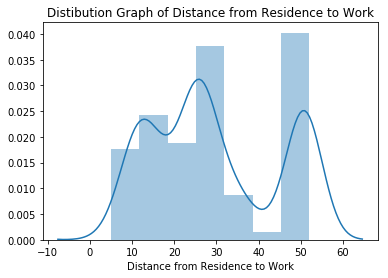

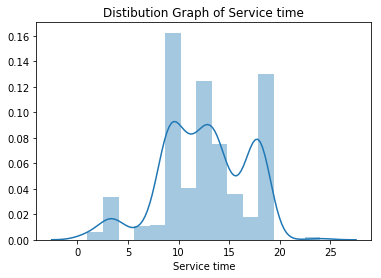

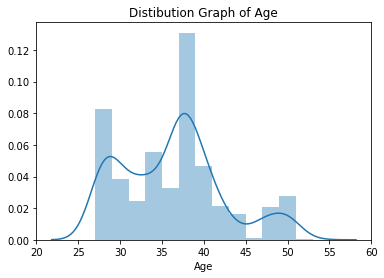

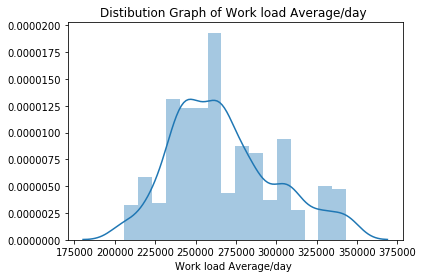

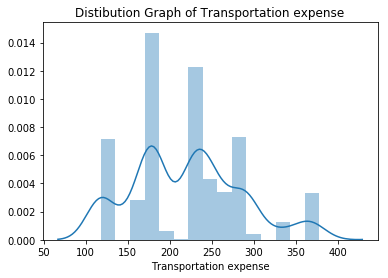

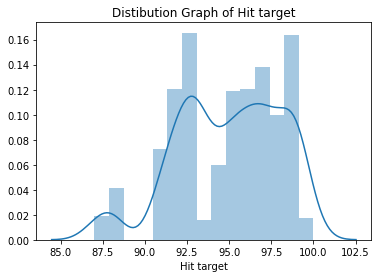

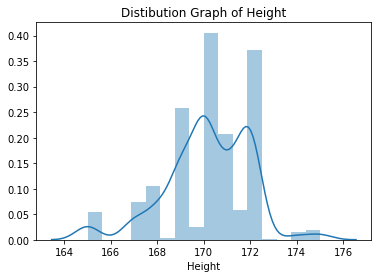

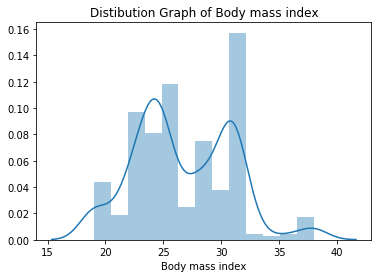

In [35]:
for i in continuous_variable:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(dataEmpAbs[i])
    plt.title('Distibution Graph of '+str(i))
    plt.xlabel(i)
    plt.show()

###  above Graphs shows that data is not Normally Distributed
#### hence we will be using Normalisation

In [36]:
for i in continuous_variable:
    dataEmpAbs[i] = (dataEmpAbs[i]-min(dataEmpAbs[i]))/(max(dataEmpAbs[i])-min(dataEmpAbs[i]))

In [37]:
#making a copy of DAta
copyDataEmpAbs = dataEmpAbs.copy()

### For Categorical features use GetDummies

In [38]:
dataEmpAbs = pd.get_dummies(data=dataEmpAbs,columns=categorical_variable,drop_first=True)

In [39]:
# To View All columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [40]:
dataEmpAbs.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,ID_2.0,ID_3.0,ID_4.0,ID_5.0,ID_6.0,ID_7.0,ID_8.0,ID_9.0,ID_10.0,ID_11.0,ID_12.0,ID_13.0,ID_14.0,ID_15.0,ID_16.0,ID_17.0,ID_18.0,ID_19.0,ID_20.0,ID_21.0,ID_22.0,ID_23.0,ID_24.0,ID_25.0,ID_26.0,ID_27.0,ID_28.0,ID_29.0,ID_30.0,ID_31.0,ID_32.0,ID_33.0,ID_34.0,ID_35.0,ID_36.0,Reason for absence_1.0,Reason for absence_2.0,Reason for absence_3.0,Reason for absence_4.0,Reason for absence_5.0,Reason for absence_6.0,Reason for absence_7.0,Reason for absence_8.0,Reason for absence_9.0,Reason for absence_10.0,Reason for absence_11.0,Reason for absence_12.0,Reason for absence_13.0,Reason for absence_14.0,Reason for absence_15.0,Reason for absence_16.0,Reason for absence_17.0,Reason for absence_18.0,Reason for absence_19.0,Reason for absence_20.0,Reason for absence_21.0,Reason for absence_22.0,Reason for absence_23.0,Reason for absence_24.0,Reason for absence_25.0,Reason for absence_26.0,Reason for absence_27.0,Reason for absence_28.0,Month of absence_1.0,Month of absence_2.0,Month of absence_3.0,Month of absence_4.0,Month of absence_5.0,Month of absence_6.0,Month of absence_7.0,Month of absence_8.0,Month of absence_9.0,Month of absence_10.0,Month of absence_11.0,Month of absence_12.0,Day of the week_3.0,Day of the week_4.0,Day of the week_5.0,Day of the week_6.0,Seasons_2.0,Seasons_3.0,Seasons_4.0,Disciplinary failure_1.0,Education_2.0,Education_3.0,Education_4.0,Social drinker_1.0,Social smoker_1.0,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.7,0.578947,0.033333,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.5,0.631579,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.5,0.631579,0.016667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.3,0.263158,0.033333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.7,0.578947,0.016667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


### Spliting the data into train test

In [41]:
X = dataEmpAbs.drop('Absenteeism time in hours',axis=1)  # selecting all variables except the target variable
y = dataEmpAbs['Absenteeism time in hours']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##  Model

#### RandomForest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor # importing the Model

In [45]:
rFr = RandomForestRegressor(n_estimators=100) # instantiate

In [46]:
rFr.fit(X_train,y_train) # training the model with test data

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
predictRfr = rFr.predict(X_test) # appling the model in test model and predicting the outcome

In [48]:
compare = pd.DataFrame({'Predict':predictRfr, 'Actual':y_test})

In [49]:
compare.head(10)

,Predict,Actual
446,0.045500,0.066667
593,0.020658,0.016667
372,0.061500,0.200000
384,0.048417,0.066667
614,0.019250,0.025000
425,0.034667,0.016667
278,0.061417,0.033333
681,0.015167,0.066667
549,0.187417,0.133333
352,0.026292,0.008333


In [50]:
from sklearn import metrics

In [51]:
print('MAE',metrics.mean_absolute_error(y_test,predictRfr))
print('MSE',metrics.mean_squared_error(y_test,predictRfr))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictRfr)))

MAE 0.043572090865667254
MSE 0.015337820965162847
RMSE 0.12384595659593756


In [52]:
predictRfr_Train = rFr.predict(X_train) # to compare the errors

In [53]:
print('MAE Train',metrics.mean_absolute_error(y_train,predictRfr_Train))
print('MSE Train',metrics.mean_squared_error(y_train,predictRfr_Train))
print('RMSE Train',np.sqrt(metrics.mean_squared_error(y_train,predictRfr_Train)))

MAE Train 0.01604679377727187
MSE Train 0.0015857262963778576
RMSE Train 0.03982117899281559


### Linear Regression model

In [54]:
from sklearn.linear_model import LinearRegression # importing the model class

In [55]:
lR = LinearRegression() # instantiate

In [56]:
lR.fit(X_train,y_train) # training the model with train Data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
predictLr = lR.predict(X_test) # appling the model with test Data

In [58]:
compareLr = pd.DataFrame({'Predict':predictLr, 'Actual':y_test})
compareLr.head()

,Predict,Actual
446,0.005859,0.066667
593,0.028809,0.016667
372,0.030640,0.200000
384,0.022949,0.066667
614,0.063721,0.025000


In [59]:
print('MAE',metrics.mean_absolute_error(y_test,predictLr))
print('MSE',metrics.mean_squared_error(y_test,predictLr))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictLr)))

MAE 3386485659.998168
MSE 1.254750577639672e+21
RMSE 35422458661.697556


In [60]:
import statsmodels.api as sm

In [61]:
model=sm.OLS(dataEmpAbs['Absenteeism time in hours'],dataEmpAbs.drop('Absenteeism time in hours',axis=1)).fit()

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.359
Model:                                   OLS   Adj. R-squared:                  0.266
Method:                        Least Squares   F-statistic:                     3.860
Date:                       Wed, 02 Oct 2019   Prob (F-statistic):           8.89e-24
Time:                               12:28:25   Log-Likelihood:                 711.51
No. Observations:                        718   AIC:                            -1239.
Df Residuals:                            626   BIC:                            -818.0
Df Model:                                 91                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation expense             -0.2093      0.350     -0.598      0.550      -0.897       0.479
Distance from Residence to Work     0.1110      0.262      0.424      0.672      -0.403       0.625
Service time                        2.3368      7.965      0.293      0.769     -13.304      17.978
Age                                 2.5777      0.321      8.041      0.000       1.948       3.207
Work load Average/day              -0.0216      0.021     -1.051      0.294      -0.062       0.019
Hit target                          0.0335      0.024      1.396      0.163      -0.014       0.081
Height                             -0.1190      0.109     -1.089      0.276      -0.334       0.096
Body mass index                     0.0891      0.224      0.398      0.691      -0.350       0.528
ID_2.0                             -0.8018      0.617     -1.300      0.194      -2.013       0.409
ID_3.0                             -1.7138      3.697     -0.464      0.643      -8.973       5.546
ID_4.0                             -0.9240      1.745     -0.529      0.597      -4.351       2.503
ID_5.0                             -0.7158      0.433     -1.653      0.099      -1.566       0.135
ID_6.0                             -0.0296      0.506     -0.059      0.953      -1.023       0.963
ID_7.0                              0.7311      0.978      0.747      0.455      -1.190       2.652
ID_8.0                              0.4645      1.356      0.343      0.732      -2.198       3.127
ID_9.0                             -0.0538      1.935     -0.028      0.978      -3.853       3.745
ID_10.0                             1.2947      2.107      0.614      0.539      -2.843       5.432
ID_11.0                             1.2499      1.310      0.954      0.340      -1.322       3.822
ID_12.0                             1.4403      3.084      0.467      0.641      -4.617       7.497
ID_13.0                            -0.0535      0.821     -0.065      0.948      -1.666       1.559
ID_14.0                             0.3381      0.106      3.194      0.001       0.130       0.546
ID_15.0                             0.5393      0.974      0.554      0.580      -1.373       2.451
ID_16.0                            -1.2447      2.498     -0.498      0.618      -6.150       3.660
ID_17.0                            -0.8486      1.605     -0.529      0.597      -4.000       2.302
ID_18.0                             0.0445      0.418      0.106      0.915      -0.777       0.866
ID_19.0                            -0.3932      1.624     -0.242      0.809      -3.582       2.795
ID_20.0                            -0.3528      0.640     -0.552      0.581      -1.609       0.903
ID_21.

### model will be feed only continous variables

In [63]:
Xl = dataEmpAbs[continuous_variable].drop('Absenteeism time in hours',axis=1)
yl = dataEmpAbs['Absenteeism time in hours']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size=0.3, random_state=101)

In [66]:
# linear regression for Continous variables
lRc = LinearRegression()


In [67]:
lRc.fit(Xl_train,yl_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
lRc

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
print(lRc.intercept_)

0.010977961128934732


In [70]:
print(lRc.coef_)

[-0.03064037  0.04120623  0.00805034  0.00546324  0.03424261  0.02199734
  0.02904932 -0.01566774]


In [71]:
pd.DataFrame(lRc.coef_,Xl.columns,columns=['Coeff'])

,Coeff
Distance from Residence to Work,-0.030640
Service time,0.041206
Age,0.008050
Work load Average/day,0.005463
Transportation expense,0.034243
Hit target,0.021997
Height,0.029049
Body mass index,-0.015668


In [72]:
predLrc = lRc.predict(Xl_test)

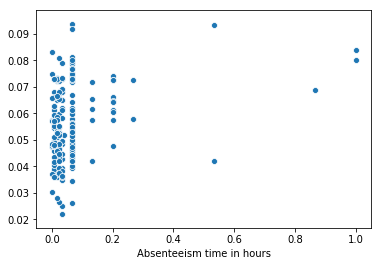

In [73]:
sns.scatterplot(yl_test,predLrc)

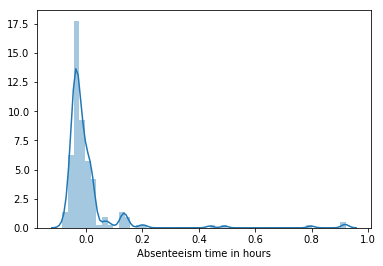

In [74]:
sns.distplot(yl_test-predLrc,bins=50) # residuals

In [75]:
print('MAE',metrics.mean_absolute_error(y_test,predLrc))
print('MSE',metrics.mean_squared_error(y_test,predLrc))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predLrc)))

MAE 0.05260653256534115
MSE 0.015136411475929711
RMSE 0.12303012426202661


# model with only Continous variables is better

### now using statsmodel.api

In [76]:
modelc=sm.OLS(dataEmpAbs.loc[:,continuous_variable[-1]],dataEmpAbs[continuous_variable].drop('Absenteeism time in hours',axis=1)).fit()

In [77]:
modelc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.239
Model:                                   OLS   Adj. R-squared:                  0.231
Method:                        Least Squares   F-statistic:                     27.90
Date:                       Wed, 02 Oct 2019   Prob (F-statistic):           7.56e-38
Time:                               12:28:27   Log-Likelihood:                 564.40
No. Observations:                        718   AIC:                            -1113.
Df Residuals:                            710   BIC:                            -1076.
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Distance from Residence to Work    -0.0500      0.015     -3.372      0.001      -0.079      -0.021
Service time                        0.0873      0.031      2.774      0.006       0.026       0.149
Age                                -0.0073      0.026     -0.276      0.783      -0.059       0.044
Work load Average/day               0.0012      0.016      0.072      0.943      -0.031       0.033
Transportation expense              0.0620      0.017      3.612      0.000       0.028       0.096
Hit target                          0.0211      0.016      1.314      0.189      -0.010       0.053
Height                              0.0381      0.020      1.940      0.053      -0.000       0.077
Body mass index                    -0.0350      0.023     -1.547      0.122      -0.080       0.009
==============================================================================
Omnibus:                      798.509   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42186.449
Skew:                           5.459   Prob(JB):                         0.00
Kurtosis:                      38.929   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### loss calculation

In [78]:
lossDF = dataEmpAbsAftImpt[['Month of absence','Absenteeism time in hours','Work load Average/day ','Service time']]
#dataEmpAbsOrgCpy.head()

In [79]:
lossDF['Loss'] = lossDF['Work load Average/day ']*lossDF['Absenteeism time in hours']/lossDF['Service time']

C:\Users\administrator\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
lossDF.head(10)

,Month of absence,Absenteeism time in hours,Work load Average/day,Service time,Loss
0,7,4,239554,13,73708.923077
1,7,0,239554,18,0.000000
2,7,2,239554,18,26617.111111
3,7,4,239554,14,68444.000000
4,7,2,239554,13,36854.461538
5,7,8,239554,3,638810.666667
6,7,4,239554,11,87110.545455
7,7,40,239554,14,684440.000000
8,7,8,239554,14,136888.000000
9,7,8,239554,11,174221.090909


In [81]:
lossDF['Loss'] = np.round(lossDF['Loss'])

C:\Users\administrator\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
lis = []
for i in range(0,13):
    loss = lossDF[lossDF['Month of absence']==i]['Loss'].sum()
    lis.append(loss)

In [88]:
lossdf = pd.DataFrame(lis,index=['zero','jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],columns=['Loss'])

In [89]:
lossdf

,Loss
zero,0.0
jan,6351550.0
feb,8268542.0
mar,15707449.0
apr,10999489.0
may,9326392.0
jun,14362241.0
jul,19015383.0
aug,8791557.0
sep,6482816.0
